In [1]:
from IPython.display import Image
import simulation.notebook_interface as notebook_interface
import simulation.behavior_tree as behavior_tree
behavior_tree.load_settings_from_file('simulation/tests/BT_TEST_SETTINGS.yaml')

Writing behavior_tree.png
Writing behavior_tree.svg


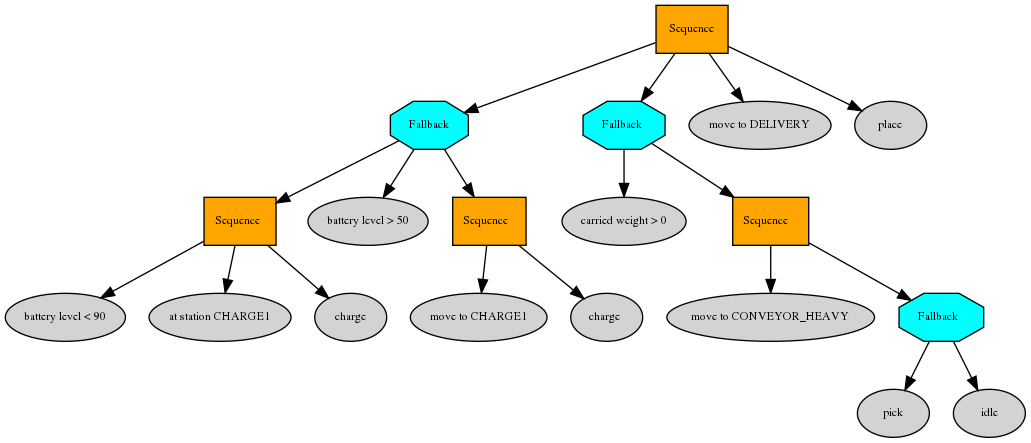

In [2]:
#Setup individual an show it
individual = ['s(', 'f(', 's(', 'battery level < 90', 'at station CHARGE1', 'charge', ')', \
                          'battery level > 50', 's(', 'move to CHARGE1', 'charge', ')', ')', \
                    'f(', 'carried weight > 0', 's(', 'move to CONVEYOR_HEAVY', 'f(', 'pick', 'idle', ')', ')', ')', \
                    'move to DELIVERY', 'place', ')']

environment = notebook_interface.Environment(seed=0, verbose=False)

environment.plot_individual('', 'behavior_tree', individual)

Image('behavior_tree.png')

In [3]:
print("Fitness:", environment.get_fitness(individual, show_world=True)) 

Fitness: 16.45


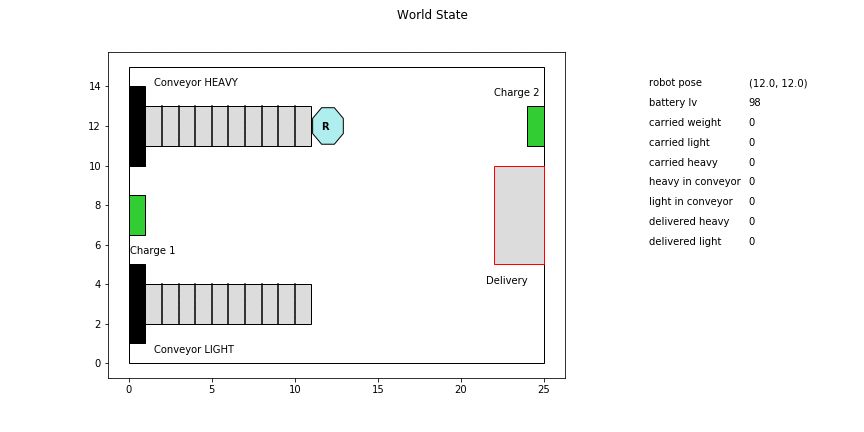

In [5]:
#Animate the last run (that had show_world=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pathlib import Path
gifPath = Path("animation.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    Image(data=f.read(), format='png')

In [6]:
#Step the run instead, first reset the environment
step_environment = notebook_interface.Environment(seed=0, verbose=False)

Writing behavior_tree.png
Writing behavior_tree.svg


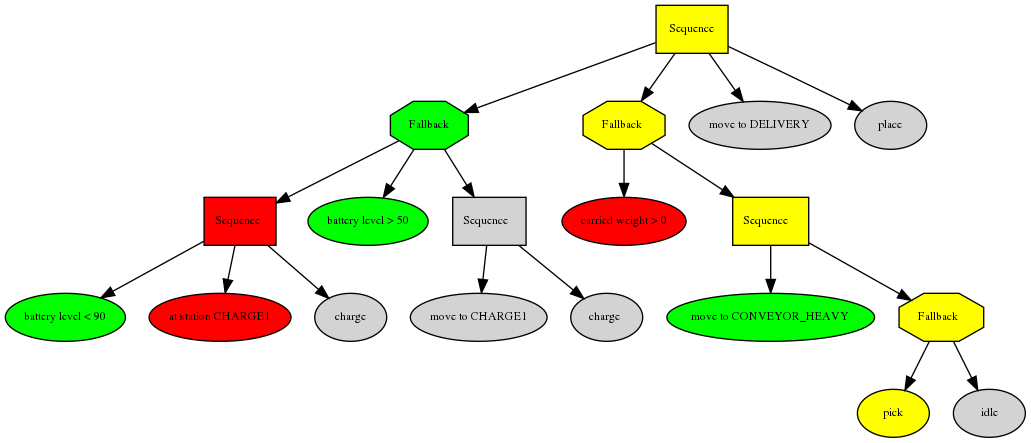

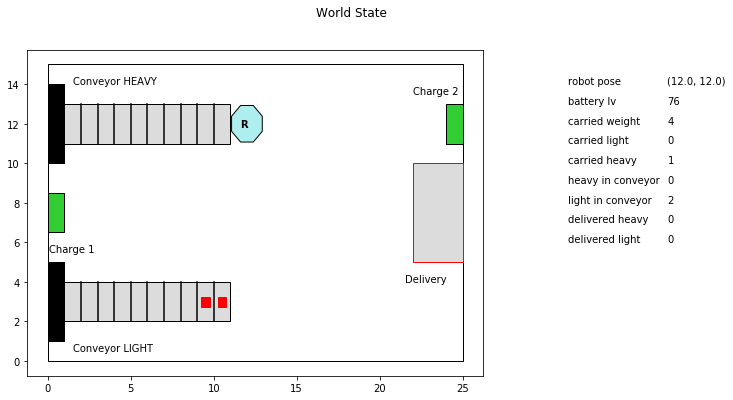

In [28]:
#Step the run one step, keep rerunning to do more steps
#Color coding of states:
#green  = success
#red    = failure
#yellow = running
#other  = not ticked
for _ in range(1):
    step_environment.step(individual, show_world=True)
    step_environment.pytree.save_fig('','behavior_tree', static=False)
    
    with open(Path("behavior_tree.png"),'rb') as f:
      Image(data=f.read(), format='png')